**Goal:** 
1) Load all the newick trees and find the height of the trees
2) Add the extra information like height, number of tips and is_ultametric to the dataframe
3) Plot a histogram of the height of the trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import dendropy
from tqdm import tqdm

plt.style.use('dark_background')

In [2]:
def load_trees(tree_path:Path):
    """Function to load the trees:
    Input: The tree path 
    Output: Tree object"""
    return dendropy.Tree.get(path=str(tree_path),schema="newick")

In [3]:
def compute_height(tree:dendropy.Tree):
    tree.calc_node_root_distances()
    tip_distance=[leaf.root_distance for leaf in tree.leaf_node_iter()]
    height=float(max(tip_distance) if tip_distance else 0.0)
    n_tips=len(tip_distance)
    is_ultrametric=bool(np.allclose(tip_distance, tip_distance[0])) if tip_distance else True
    return height,is_ultrametric



In [8]:
def main():
    base_path=Path.cwd().parent
    file_path=base_path/"data"/"processed"/"parameters.csv"
    trees_df=pd.read_csv(file_path)

    height=[]
    is_ultametric=[]


    for file_id in tqdm(trees_df["file_id"].to_list()):
        tree_path=base_path/"data"/"raw"/f"{int(file_id)}.nwk"
        tree=load_trees(tree_path)
        h,u=compute_height(tree)
        height.append(h)
        is_ultametric.append(u)

    trees_df["height"]=height
    trees_df["is_ultrametric"]=is_ultametric

    output_csv=base_path/"data"/"processed"/"preprocessed_parameters.csv"
    trees_df.to_csv(output_csv,index=False)
    print(f"Saved to: {output_csv}")

    sns.histplot(trees_df,x=height,kde=True)

    

100%|██████████| 100/100 [00:04<00:00, 23.48it/s]


Saved to: c:\Users\khadk\OneDrive\Desktop\phylogenetics\data\processed\preprocessed_parameters.csv


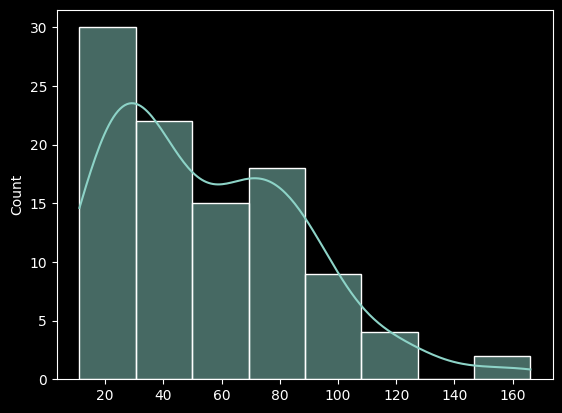

In [9]:
if __name__== "__main__":
    main()